##### Naive Bayes Classification

- 베이즈 정리를 적용한 확률적 분류 알고리즘
- 모든 특성들이 독립임을 가정 (naive 가정)
- 입력 특성에 따라 3개의 분류기 존재

    - 가우시안 나이브 베이즈 분류기
    - 베르누이 나이브 베이즈 분류기
    - 다항 나이브 베이즈 분류기

##### Probability Model of Naive Bayes Classification

- 나이브 베이즈는 조건부 확률 모델
- N개의 특성을 나타내는 벡터 x를 입력 받아 K개의 가능한 확률적 결과를 출력
- 나이브 베이즈는 모든 특성이 독립이라고 가정

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.datasets import fetch_covtype, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn import metrics

In [2]:
prior = [0.45, 0.3, 0.15, 0.1]
likelihood = [[0.3,0.3,0.4], [0.7,0.2,0.1], [0.15,0.5,0.35], [0.6,0.2,0.2]]

idx = 0
for c, xs in zip(prior, likelihood):
    result = 1.

    for x in xs:
        result *= x
    result *= c

    idx += 1
    print(f'{idx} 번째 클래스의 가능성 : {result}')

1 번째 클래스의 가능성 : 0.0162
2 번째 클래스의 가능성 : 0.0042
3 번째 클래스의 가능성 : 0.0039375
4 번째 클래스의 가능성 : 0.0024000000000000002


##### 산림 토양 데이터

- 산림 지역 토양의 특징 데이터
- 토양이 어떤 종류에 속하는지 예측

In [3]:
covtype = fetch_covtype()
print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

=================   ============
Classes                        7
Samples total             581012
Dimensionality                54
Features                     int
=================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional argument 'as_frame' is
se

In [7]:
covtype_df = pd.DataFrame(data = covtype.data, columns=covtype.feature_names)
covtype_df['target'] = covtype.target
covtype_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [17]:
covtype_X_train, covtype_X_test, covtype_y_train, covtype_y_test = train_test_split(covtype.data, covtype.target, test_size=0.2, random_state=42)

In [19]:
# Data Preprocessing

scaler = StandardScaler()
covtype_X_train_scaler = scaler.fit_transform(covtype_X_train)
covtype_X_test_scaler = scaler.transform(covtype_X_test)

##### 20 Newsgroup Data

- 뉴스 기사가 어느 그룹에 속하는지 분류
- 뉴스 기사는 텍스트 데이터이기 때문에 맞는 전처리가 필요함

In [22]:
newsgroups = fetch_20newsgroups()
print(newsgroups.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

=================   ==========
Classes                     20
Samples total            18846
Dimensionality               1

In [27]:
newsgroups_df = pd.DataFrame(data=newsgroups.data)
newsgroups_df

,0
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...
...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...
11311,From: westes@netcom.com (Will Estes)\nSubject:...
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...


In [36]:
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [38]:
# Train, Test Data Classification

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [39]:
X_train, y_train = newsgroups_train.data, newsgroups_train.target
X_test, y_test = newsgroups_test.data, newsgroups_test.target

##### 텍스트 벡터화

- 벡터화는 텍스트 데이터를 실수 벡터로 변환해 ML Model에 입력할 수 있도록 하는 전처리 과정
- Scikit-learn 에서는 Count, Tf-idf, Hashing 세 가지 방법을 사용할 수 있음

##### <span style="color:pink">CountVectorizer</span>

- 문서에 나온 단어의 수를 카운팅 해서 벡터 생성

In [40]:
count_vectorizer = CountVectorizer()

In [41]:
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count  = count_vectorizer.transform(X_test)

- 데이터를 희소 행렬 형태로 표현

In [51]:
for v in X_train_count[0]:
    print(v)

  (0, 56979)	3
  (0, 75358)	2
  (0, 123162)	2
  (0, 118280)	2
  (0, 50527)	2
  (0, 124031)	2
  (0, 85354)	1
  (0, 114688)	1
  (0, 111322)	1
  (0, 123984)	1
  (0, 37780)	5
  (0, 68532)	3
  (0, 114731)	5
  (0, 87620)	1
  (0, 95162)	1
  (0, 64095)	1
  (0, 98949)	1
  (0, 90379)	1
  (0, 118983)	1
  (0, 89362)	3
  (0, 79666)	1
  (0, 40998)	1
  (0, 92081)	1
  (0, 76032)	1
  (0, 4605)	1
  :	:
  (0, 37565)	1
  (0, 113986)	1
  (0, 83256)	1
  (0, 86001)	1
  (0, 51730)	1
  (0, 109271)	1
  (0, 128026)	1
  (0, 96144)	1
  (0, 78784)	1
  (0, 63363)	1
  (0, 90252)	1
  (0, 123989)	1
  (0, 67156)	1
  (0, 128402)	2
  (0, 62221)	1
  (0, 57308)	1
  (0, 76722)	1
  (0, 94362)	1
  (0, 78955)	1
  (0, 114428)	1
  (0, 66098)	1
  (0, 35187)	1
  (0, 35983)	1
  (0, 128420)	1
  (0, 86580)	1


##### <span style="color:pink">HashingVectorizer</span>

- 각 단어를 해쉬 값으로 표현
- 미리 정해진 크기의 벡터로 표현

In [60]:
hash_vectorizer = HashingVectorizer(n_features=1000) # feature 수 제한 즉, 제한된 크기의 벡터를 갖게 만듬

In [62]:
X_train_hash = hash_vectorizer.fit_transform(X_train)
X_test_hash = hash_vectorizer.transform(X_test)

In [65]:
for v in X_train_hash[0]:
    print(v)

  (0, 80)	-0.0642824346533225
  (0, 108)	0.0642824346533225
  (0, 111)	-0.128564869306645
  (0, 145)	0.0642824346533225
  (0, 158)	0.0642824346533225
  (0, 159)	-0.0642824346533225
  (0, 161)	0.0642824346533225
  (0, 165)	-0.0642824346533225
  (0, 171)	0.0642824346533225
  (0, 182)	0.0642824346533225
  (0, 195)	-0.0642824346533225
  (0, 196)	0.19284730395996752
  (0, 205)	-0.0642824346533225
  (0, 209)	0.0642824346533225
  (0, 234)	0.0642824346533225
  (0, 237)	0.0642824346533225
  (0, 248)	0.0642824346533225
  (0, 265)	0.19284730395996752
  (0, 274)	0.0642824346533225
  (0, 277)	0.19284730395996752
  (0, 284)	-0.0642824346533225
  (0, 286)	-0.0642824346533225
  (0, 296)	0.0642824346533225
  (0, 362)	-0.0642824346533225
  (0, 364)	-0.0642824346533225
  :	:
  (0, 739)	0.0
  (0, 761)	-0.0642824346533225
  (0, 766)	0.0642824346533225
  (0, 800)	-0.0642824346533225
  (0, 812)	-0.0642824346533225
  (0, 842)	0.0642824346533225
  (0, 848)	-0.0642824346533225
  (0, 851)	0.0642824346533225
  (0

##### <span style="color:pink">Tf-idf Vectorizer</span>

- 문서에 나온 단어 빈도(term frequency)와 역문서 빈도(inverse document frequency)를 곱해서 구함
- 각 빈도는 일반적으로 로그 스케일링 후 사용

    - <span style = "color:pink">TF(Term Frequency)</span> : 단어 빈도
        - 한 문서 내에서 특정 단어가 등장하는 빈도
        - 특정 단어가 문서에서 얼마나 자주 등장했는지 측정하여 해당 단어의 중요도 평가

    - <span style = "color:pink">IDF(Inverse Document Frequency)</span> : 역문서 빈도
        - 특정 단어가 여러 문서에 공통적으로 등장하는 경우, 해당 단어의 중요도를 낮게 평가
        - 흔히 등장하는 단어는 덜 중요한 것으로 간주됨

- $\displaystyle tf(t,d) = log(f(t,d)+1)$

- $\displaystyle tf(t,D) = \frac{|D|}{|d \in D : t \in d| +1}$

- $\displaystyle tf-idf(t,d,D) = tf(t,d) \times idf(t,D)$

In [69]:
tfidf_vectorizer = TfidfVectorizer()

In [70]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [71]:
for v in X_train_tfidf[0]:
    print(v)

  (0, 56979)	0.0574701540748513
  (0, 75358)	0.3538350134970617
  (0, 123162)	0.25970902457356887
  (0, 118280)	0.21186807208281694
  (0, 50527)	0.05461428658858725
  (0, 124031)	0.10798795154169123
  (0, 85354)	0.03696978508816317
  (0, 114688)	0.06214070986309587
  (0, 111322)	0.019156718024950434
  (0, 123984)	0.036854292634593756
  (0, 37780)	0.3813389125949312
  (0, 68532)	0.07325812342131598
  (0, 114731)	0.1444727551278406
  (0, 87620)	0.0356718631408158
  (0, 95162)	0.03447138409326312
  (0, 64095)	0.035420924271313554
  (0, 98949)	0.16068606055394935
  (0, 90379)	0.01992885995664587
  (0, 118983)	0.03708597805061915
  (0, 89362)	0.06521174306303765
  (0, 79666)	0.10936401252414275
  (0, 40998)	0.07801368196918111
  (0, 92081)	0.09913274493911224
  (0, 76032)	0.01921946305222309
  (0, 4605)	0.06332603952480324
  :	:
  (0, 37565)	0.03431760442478462
  (0, 113986)	0.17691750674853085
  (0, 83256)	0.08844382496462175
  (0, 86001)	0.07000411445838192
  (0, 51730)	0.0971474405797672

##### <span style = "color:pink"> Gaussian Naive Bayes </span>

- 입력 특성이 정규 분포를 갖는다고 가정

In [72]:
model = GaussianNB()
model.fit(covtype_X_train_scaler, covtype_y_train)

GaussianNB()

In [74]:
predict = model.predict(covtype_X_train_scaler)
acc = metrics.accuracy_score(covtype_y_train, predict)
f1score = metrics.f1_score(covtype_y_train, predict, average=None)

print(f'Train Accuracy Scores : {acc}')
print(f'Train F1-Score : {f1score}')

Train Accuracy Scores : 0.08816524637001436
Train F1-Score : [0.04026276 0.01796394 0.335506   0.13940497 0.04300519 0.07013245
 0.23643689]


In [75]:
predict = model.predict(covtype_X_test_scaler)
acc = metrics.accuracy_score(covtype_y_test, predict)
f1score = metrics.f1_score(covtype_y_test, predict, average=None)

print(f'Test Accuracy Scores : {acc}')
print(f'Test F1-Score : {f1score}')

Test Accuracy Scores : 0.0872869030920028
Test F1-Score : [0.0411202  0.0178978  0.33291615 0.13404689 0.0447729  0.06713287
 0.22799902]


- 왤케 낮음 ㅇㅁㅇ

In [76]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [82]:
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [85]:
X, y = make_blobs(n_samples=1000)

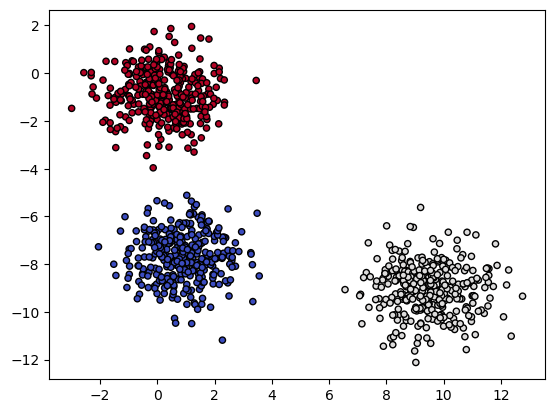

In [86]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [87]:
model = GaussianNB()
model.fit(X, y)

GaussianNB()

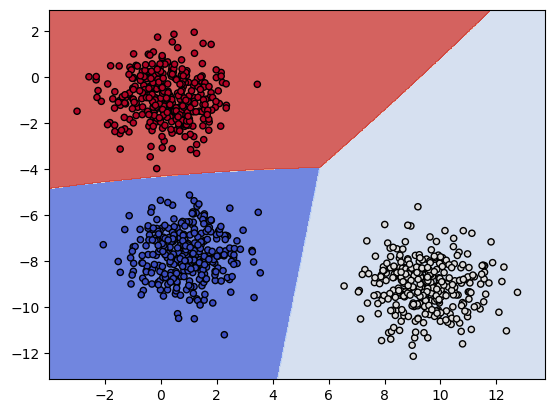

In [90]:
xx, yy = make_meshgrid(X[:, 0], X[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

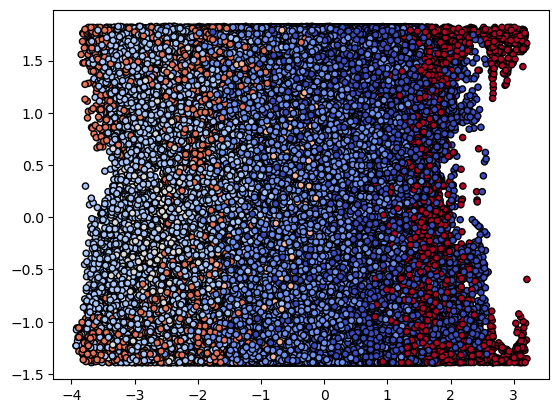

In [96]:
plt.scatter(covtype_X_train_scaler[:, 0], covtype_X_train_scaler[:, 1], c=covtype_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

##### <span style = "color:pink">Bernoulli Naive Bayes</span>

- 입력 특성이 베르누이 분포에 의해 생성된 이진 값을 갖는다고 가정함

**Training & Test (Count)**

In [158]:
model = BernoulliNB()
model.fit(X_train_count, y_train)

BernoulliNB()

In [159]:
# Train Scores

predict = model.predict(X_train_count)
acc = metrics.accuracy_score(y_train, predict)
f1score = metrics.f1_score(y_train, predict, average=None)

print(f'Train Acc : {acc}')
print(f'Train F1-score : {f1score.mean()}')

Train Acc : 0.7821283365741559
Train F1-score : 0.7584575058754413


In [160]:
# Test Scores

predict = model.predict(X_test_count)
acc = metrics.accuracy_score(y_test, predict)
f1score = metrics.f1_score(y_test, predict, average=None)

print(f'Test Acc : {acc}')
print(f'Test F1-score : {f1score.mean()}')

Test Acc : 0.6307753584705258
Test F1-score : 0.5954590460237668


**Training & Test (Hash)**

In [161]:
model = BernoulliNB()
model.fit(X_train_hash, y_train)

BernoulliNB()

In [162]:
# Hash Train Score

predict = model.predict(X_train_hash)
acc = metrics.accuracy_score(y_train, predict)
f1score = metrics.f1_score(y_train, predict, average=None)

print(f'Train Acc : {acc}')
print(f'Train F1 Scores : {f1score.mean()}')

Train Acc : 0.5951917977726711
Train F1 Scores : 0.613936940992062


In [163]:
# Hash Test Score

predict = model.predict(X_test_hash)
acc = metrics.accuracy_score(y_test, predict)
f1score = metrics.f1_score(y_test, predict, average=None)

print(f'Test Acc : {acc}')
print(f'Test F1 Scores : {f1score.mean()}')

Test Acc : 0.4430430164630908
Test F1 Scores : 0.4480592180726746


**Training & Test (Tf-idf)**

In [164]:
model = BernoulliNB()
model.fit(X_train_tfidf, y_train)

BernoulliNB()

In [165]:
# Hash Training Scores

predict = model.predict(X_train_tfidf)
acc = metrics.accuracy_score(y_train, predict)
f1score = metrics.f1_score(y_train, predict,average=None)

print(f'Train Acc {acc}')
print(f'Train F1 Scores  {f1score.mean()}')

Train Acc 0.7821283365741559
Train F1 Scores  0.7584575058754413


In [166]:
# Hash Training Scores

predict = model.predict(X_test_tfidf)
acc = metrics.accuracy_score(y_test, predict)
f1score = metrics.f1_score(y_test, predict, average=None)

print(f'Test Acc {acc}')
print(f'Test F1 Scores  {f1score.mean()}')

Test Acc 0.6307753584705258
Test F1 Scores  0.5954590460237668


##### 시각화

In [167]:
X, y = make_blobs(n_samples=1000)

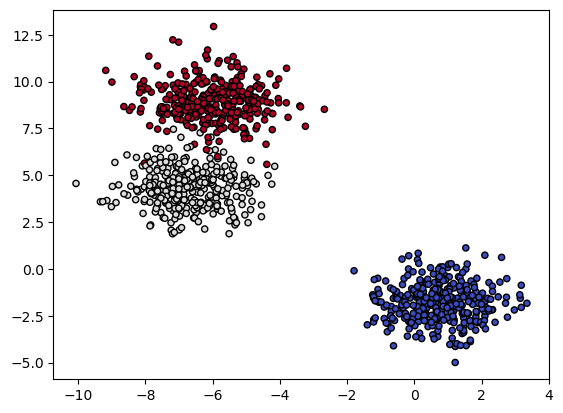

In [168]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [169]:
model = BernoulliNB()
model.fit(X, y)

BernoulliNB()

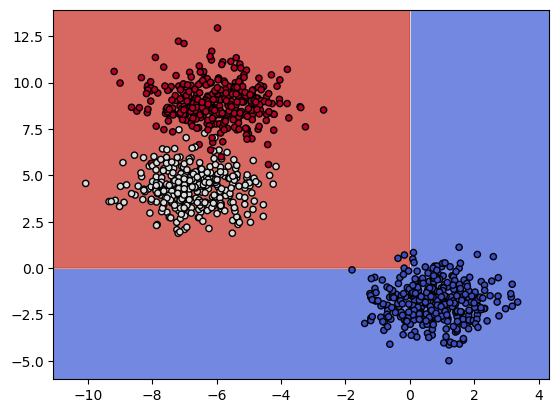

In [170]:
xx, yy = make_meshgrid(X[:, 0], X[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

##### **<span style="color:pink">Multinomial Naive Bayes</span>**

- 입력 특성이 다항분포에 의해 생성된 빈도수 값을 갖는 다고 가정

In [171]:
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [172]:
# Training Scores

predict = model.predict(X_train_count)
acc = metrics.accuracy_score(y_train, predict)
f1score = metrics.f1_score(y_train, predict, average=None)

print(f'Training Acc : {acc}')
print(f'Training F1 Scores : {f1score.mean()}')

Training Acc : 0.9245182959165635
Training F1 Scores : 0.9104924822254217


In [173]:
# Test Scores

predict = model.predict(X_test_count)
acc = metrics.accuracy_score(y_test, predict)
f1score = metrics.f1_score(y_test, predict, average=None)

print(f'Test Acc : {acc}')
print(f'Test F1 Scores : {f1score.mean()}')

Test Acc : 0.7728359001593202
Test F1 Scores : 0.7450982330052152
